In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats

In [2]:
X = np.array([
    31, 58, 65, 73, 37, 44, 60, 91, 21, 84
])
Z = np.array([
    [1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
    [4,  9, 10, 14,  4,  7, 12, 22,  1, 17]
])
n = X.shape[0]

In [3]:
A = Z @ Z.T
A

array([[  10,  100],
       [ 100, 1376]])

In [4]:
w = np.linalg.inv(A) @ Z @ X
w

array([21.69255319,  3.47074468])

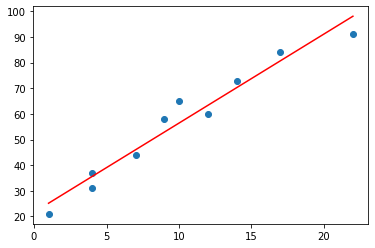

In [5]:
s = Z[1].argsort()
xs = Z[1][s]
ys = X[s]
plt.scatter(xs, ys)
plt.plot([xs[0], xs[-1]], [
    w[0] + xs[0]*w[1],
    w[0] + xs[-1]*w[1]
], c='r')

In [6]:
w[0] + w[1] * 10

56.39999999999998

In [7]:
S = np.linalg.norm(X - w @ Z)
S

14.935802338319887

In [8]:
xbar = X.mean()
Sxx = np.square(X - xbar).sum()
Sxx

4752.4

In [9]:
c = scipy.stats.t(n-2).ppf(0.5+0.95/2)
c

2.3060041350333704

In [13]:
d = np.sqrt(S/n + (10-xbar)**2/Sxx) * c / np.sqrt(n-2)
d

1.1375071239935959

In [15]:
56.4 - d, 56.4 + d

(55.262492876006405, 57.53750712399359)

In [19]:
Ainv_ii = np.linalg.inv(A)[1,1]
Ainv_ii

0.002659574468085106

In [20]:
t_0 = np.sqrt(n-2-1) * (w[1] - 3)/np.sqrt(S * Ainv_ii)
t_0

6.249051231628421

In [21]:
t_crit = sp.stats.t(n-2-1).ppf(1-0.01/2)
t_crit

3.4994832973505026

In [32]:
Ainv

array([[ 1.83616536,  2.57458672],
       [ 2.57458672, 37.00501997]])

In [34]:
d = np.sqrt( S * Ainv_ii / (n-2-1) ) * sp.stats.t(n-2-1).ppf((1+0.95)/2)
d

0.17812852657385914

In [35]:
w[1] - d, w[1] + d

(3.292616154277205, 3.6488732074249235)